In [18]:
from astropy.io import fits
from astropy.table import Table
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [19]:
!ls

 astropy_CART_DPS_t.jpg
 astropy_SPH_DPS_t.jpg
 clusters_filtered_RaDecZ.csv
 coma_filtered_RaDecZ.csv
'coma_MGS_RaDecZ_dist_XYZ:0.00|0.06.csv'
 _disperse_01
 _disperse_02
 _disperse_03
 _disperse_04
 DisPerSe_2D_smooth:1_s:3_board:smooth_asmb:90.jpg
 DisPerSe_2D_smooth:1_s:5_board:smooth_asmb:90.jpg
 DisPerSe.ipynb
 disperse_MGS_coma_2D.ipynb
 disperse_MGS_coma_cart.ipynb
 disperse_MGS_coma.ipynb
 disperse.py
 disperse_sdss7_coma.ipynb
 distances.h
 dist_CART_DPS_t.jpg
 dist_SPH_DPS_t.jpg
 main.ipynb
 MCXC.txt
 MGS
 MGS_coma_ascii.txt
 min_CART_DPS_t.jpg
 min_SPH_DPS_t.jpg
 my_dist.c
'OLD_coma_MGS_RaDecZ_XYZ:0.00|0.06.csv'
 old_img
 __pycache__
 README.md
 SDSS
 table2.dat.gz
 visual.ipynb


In [20]:
galaxies = pd.read_csv('SDSS/SDSS_DR7.csv')

In [22]:
galaxies

,ra,dec,z,cx,cy,cz,zErr,zConf,zWarning,type,petroMag_r
0,146.71421,-1.041304,0.021314,-0.835805,0.548725,-0.018173,0.000175,0.998538,0,3.0,14.86596
1,146.91945,-0.990492,0.213991,-0.837779,0.545736,-0.017286,0.000130,0.999355,0,3.0,17.73796
2,146.90229,-0.984913,0.651810,-0.837617,0.545988,-0.017189,0.000931,0.988533,0,6.0,19.58683
3,146.85983,-0.808902,0.126660,-0.837252,0.546635,-0.014118,0.000165,0.999525,0,3.0,17.45244
4,146.76339,-0.810433,0.448533,-0.836331,0.548043,-0.014144,0.000215,0.997568,0,3.0,19.28286
...,...,...,...,...,...,...,...,...,...,...,...
1599445,260.71601,32.024276,0.167412,-0.136778,-0.836718,0.530279,0.000139,0.999942,0,3.0,16.92561
1599446,260.69724,32.285628,0.111586,-0.136659,-0.834277,0.534140,0.000154,0.999824,0,3.0,16.59268
1599447,260.71625,32.092904,0.223961,-0.136672,-0.836091,0.531294,0.000171,0.999148,0,3.0,17.59340
1599448,260.79497,31.936117,2.188700,-0.135755,-0.837710,0.528973,0.001868,0.990211,0,6.0,18.79307


In [23]:
# galaxies = galaxies.loc[galaxies['class'] == 'GALAXY']
galaxies = galaxies[['ra', 'dec', 'z']]
galaxies.columns = ['RA', 'DEC', 'Z']
galaxies

,RA,DEC,Z
0,146.71421,-1.041304,0.021314
1,146.91945,-0.990492,0.213991
2,146.90229,-0.984913,0.651810
3,146.85983,-0.808902,0.126660
4,146.76339,-0.810433,0.448533
...,...,...,...
1599445,260.71601,32.024276,0.167412
1599446,260.69724,32.285628,0.111586
1599447,260.71625,32.092904,0.223961
1599448,260.79497,31.936117,2.188700


In [1]:
dat = Table.read('DR5_cluster-catalog_v1.1.fits', format='fits')
clusters = dat[['RADeg', 'decDeg', 'redshift', 'redshiftType']].to_pandas()
clusters = clusters[clusters['redshiftType'] == b'spec']
clusters = clusters[['RADeg', 'decDeg', 'redshift']]
clusters.columns = ['RA', 'DEC', 'Z']
clusters

NameError: name 'Table' is not defined

In [36]:
def plot_galaxies(galaxies, clusters=None,
                  ra_int=(0, 360), dec_int=(-90, 90), z_int=(0,1), proj=['RA', 'DEC', 'Z'],
                  fig_size=(16, 8),
                  points_show=False, points_s=10, points_alpha=1.0,
                  hist_show=False, hist_bins=(200, 100),
                  kde_show=False, kde_s=100, kde_alpha=1.0, kde_bins=(200j, 200j), kde_wide=0.05,
                  clusters_show=False, clusters_s=200, clusters_alpha=1.0,
                  save=False, name='temp.jpg'):
    g = galaxies[
            (ra_int[0] < galaxies['RA']) & (galaxies['RA'] < ra_int[1]) & \
            (dec_int[0] < galaxies['DEC']) & (galaxies['DEC'] < dec_int[1]) & \
            (z_int[0] < galaxies['Z']) & (galaxies['Z'] < z_int[1])
        ]
    if clusters is not None:
        c = clusters[
                (ra_int[0] < clusters['RA']) & (clusters['RA'] < ra_int[1]) & \
                (dec_int[0] < clusters['DEC']) & (clusters['DEC'] < dec_int[1]) & \
                (z_int[0] < clusters['Z']) & (clusters['Z'] < z_int[1])
            ]
    
    font = {'size': 16}
    plt.rc('font', **font)
    fig = plt.figure(figsize=fig_size)
    
    if kde_show:
        d = np.vstack((g[proj[0]], g[proj[1]]))
        proj_dict = {
            'RA': ra_int,
            'DEC': dec_int,
            'Z': z_int
        }
        X, Y = np.mgrid[proj_dict[proj[0]][0]:proj_dict[proj[0]][1]:kde_bins[0], proj_dict[proj[1]][0]:proj_dict[proj[1]][1]:kde_bins[1]]
        pos = np.vstack([X.ravel(), Y.ravel()]) 
        kernel = gaussian_kde(d, bw_method=kde_wide)
        z = kernel(pos)
        plt.scatter(pos[0], pos[1], c=z, s=kde_s, alpha=kde_alpha)
    
    if hist_show:
        plt.hist2d(g[proj[0]], g[proj[1]], hist_bins, cmap=plt.cm.hot)
        plt.colorbar()
    
    if clusters is not None and clusters_show:
        plt.scatter(c[proj[0]], c[proj[1]], c='yellow', s=clusters_s, alpha=clusters_alpha)
        
    if points_show:
        plt.scatter(g[proj[0]], g[proj[1]], c='r', s=points_s)
    
    ax = fig.get_axes()
    ax[0].invert_xaxis()
    plt.title(f'{proj[2]} in {z_int}')
    plt.xlabel(proj[0])
    plt.ylabel(proj[1])
    
    plt.tick_params(axis='x')
    
    if save:
        plt.savefig(name, dpi=300, format='jpg')

In [37]:
coma = pd.read_csv('coma_filtered_RaDecZ.csv')
coma

,RA,DEC,Z
0,146.714217,-1.041278,0.021265
1,147.176391,-0.354031,0.006325
2,146.751726,-0.408398,0.035831
3,146.355774,-0.143377,0.030758
4,146.299850,-0.120005,0.030694
...,...,...,...
50952,259.398924,34.107623,0.038559
50953,259.783099,33.571375,0.037837
50954,259.763021,34.008389,0.038148
50955,259.206415,31.755735,0.023720


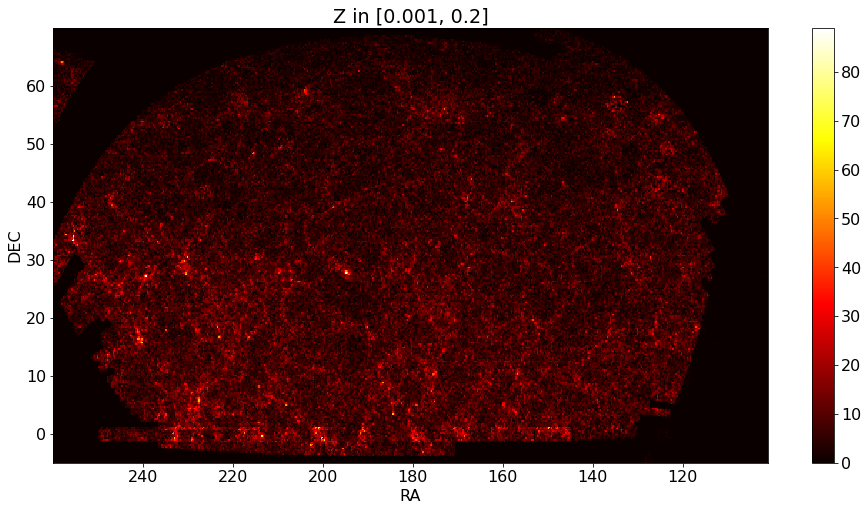

In [38]:
plot_galaxies(
    galaxies=galaxies,
    ra_int=[100, 260],
    dec_int=[-5,70],
    z_int=[0.001,0.2],
    hist_show=True, hist_bins=(500, 250),
    save=True
)

In [ ]:
plot_galaxies(
    galaxies=coma,
    ra_int=[135,260],
    dec_int=[-5,70],
    z_int=[0.005,0.05],
    proj=['RA', 'DEC', 'Z'],
    fig_size=(30, 20),
    points_show=True, points_s=3,
    kde_show=True, kde_alpha=1.0, kde_wide=0.1
)

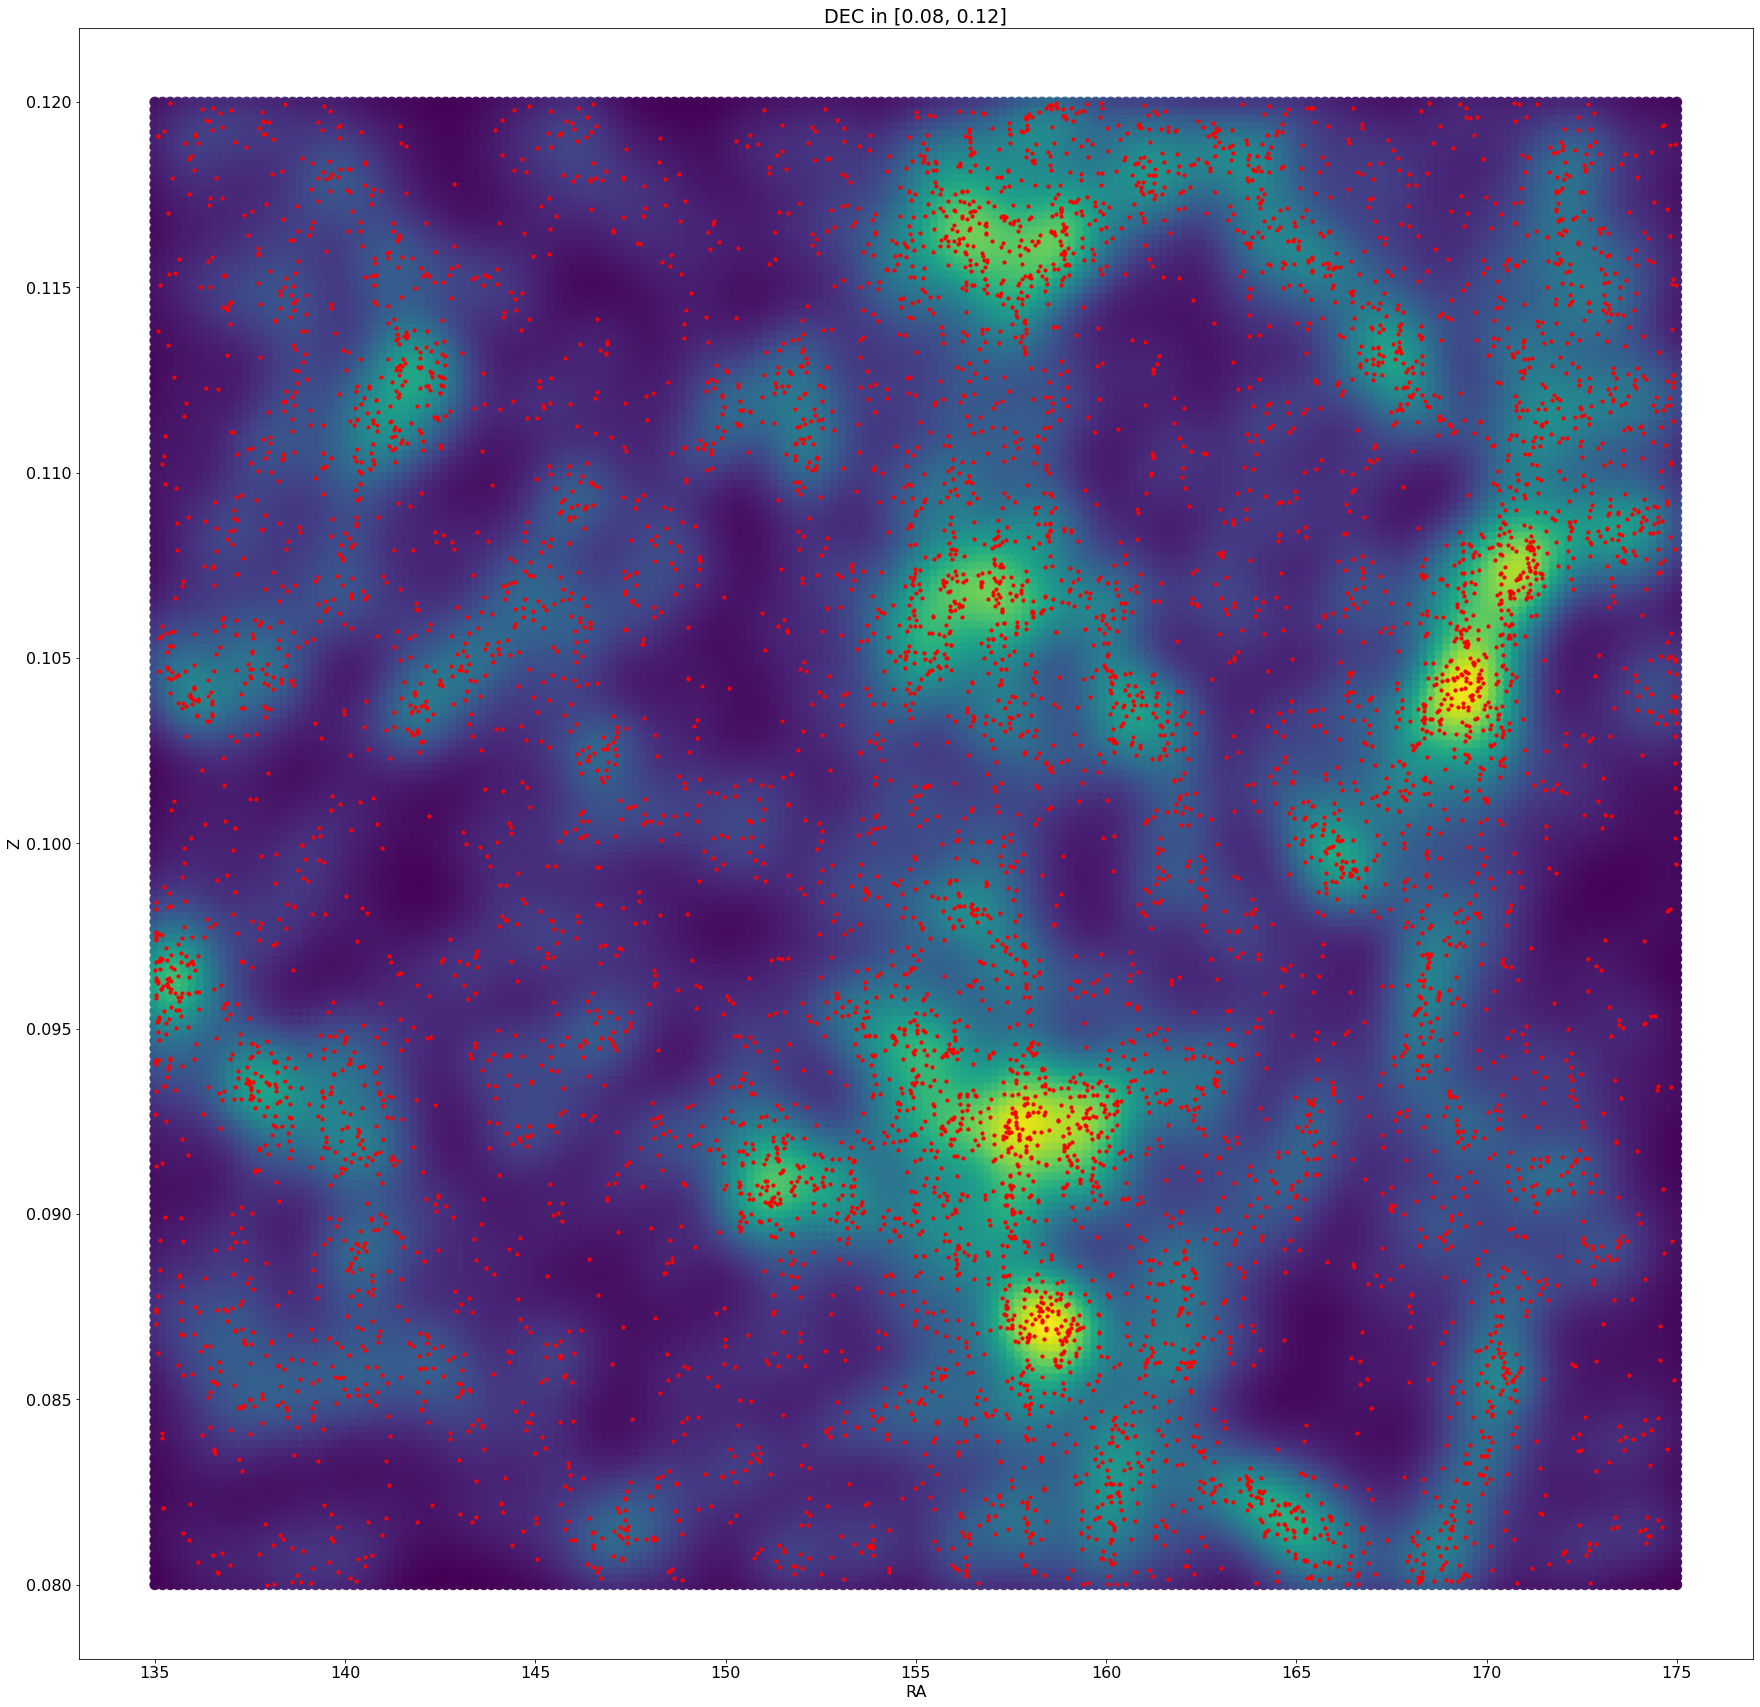

In [30]:
plot_galaxies(
    galaxies=galaxies, 
    clusters=clusters,
    ra_int=[135,175],
    dec_int=[35,45],
    z_int=[0.08,0.12],
    proj=['RA', 'Z', 'DEC'],
    fig_size=(30, 30),
    clusters_show=True, clusters_alpha=1.0, clusters_s=1000,
    points_show=True, points_s=10,
    kde_show=True, kde_alpha=1.0, kde_wide=0.07
)

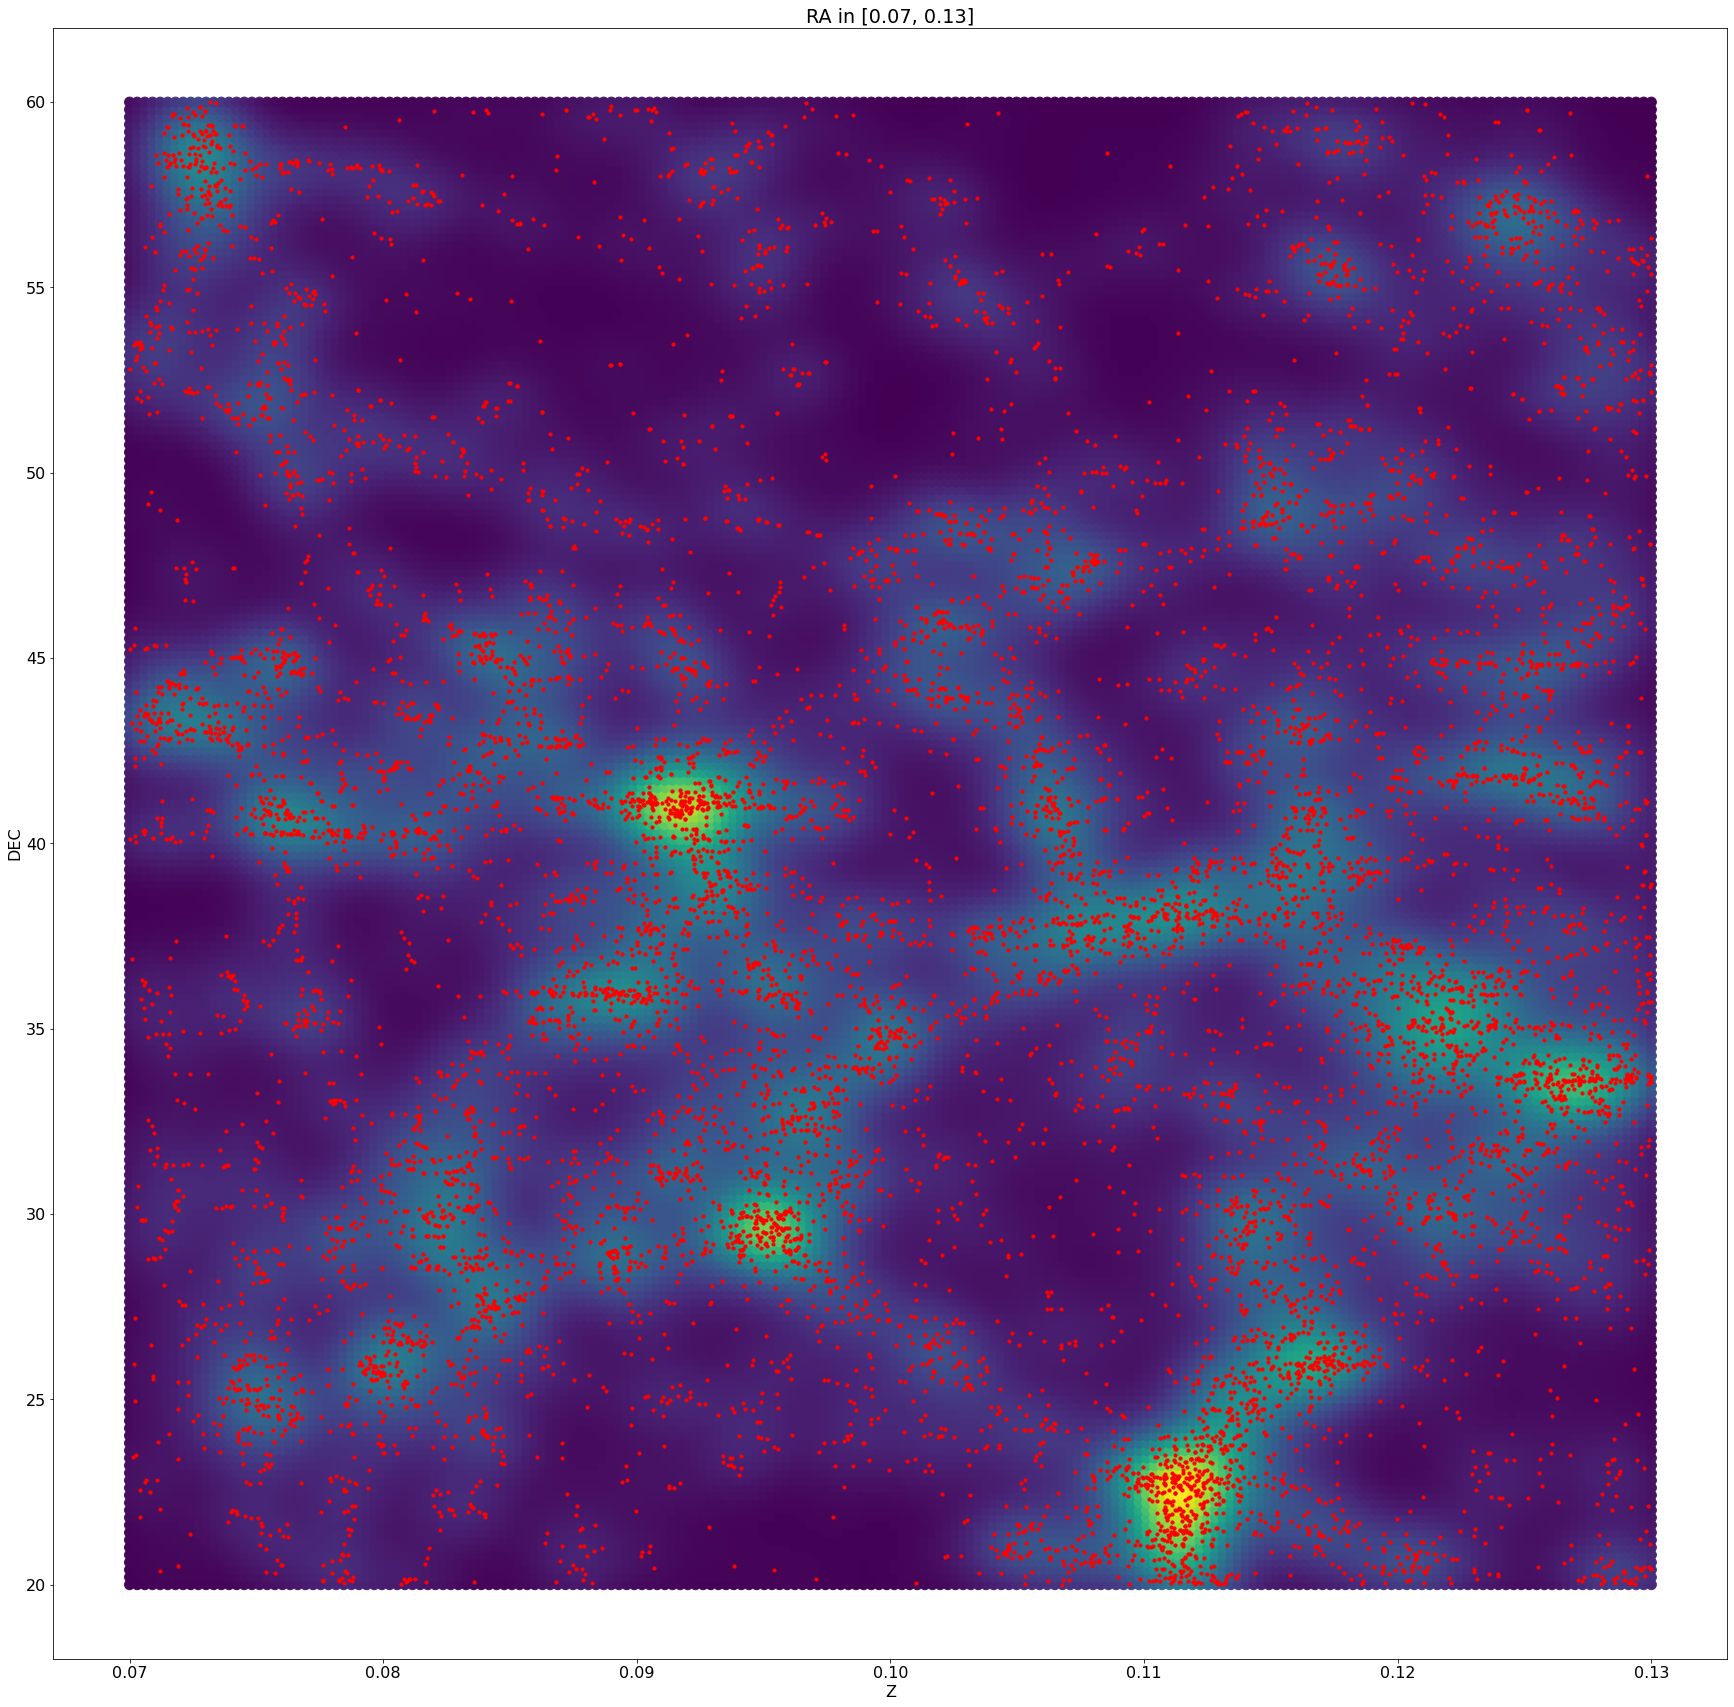

In [32]:
plot_galaxies(
    galaxies=galaxies, 
    clusters=clusters,
    ra_int=[150,160],
    dec_int=[20,60],
    z_int=[0.07,0.13],
    proj=['Z', 'DEC', 'RA'],
    fig_size=(30, 30),
    clusters_show=True, clusters_alpha=1.0, clusters_s=1000,
    points_show=True, points_s=10,
    kde_show=True, kde_alpha=1.0, kde_wide=0.07
)